#Mounting drive and creating the workspace

Mounting drive to save your work

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Creating working folder and cloning source code from github

In [ ]:
%cd '/content/drive/MyDrive'
!mkdir 'Datacomp_demo'
%cd 'Datacomp_demo'
!git clone 'https://github.com/fsoft-ailab/Data-Competition'
%cd Data-Competition/
!pip install -r requirements.txt

/content/drive/MyDrive
/content/drive/MyDrive/Datacomp_demo
Cloning into 'Data-Competition'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 185 (delta 83), reused 122 (delta 38), pack-reused 0
Receiving objects: 100% (185/185), 25.08 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (83/83), done.
/content/drive/MyDrive/Datacomp_demo/Data-Competition
     |████████████████████████████████| 3.1 MB 12.2 MB/s 
     |████████████████████████████████| 596 kB 15.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

Using symlink for convenient

In [ ]:
import os
os.symlink('/content/drive/MyDrive/Datacomp_demo','/content/Datacomp_demo')
%cd '/content/Datacomp_demo/Data-Competition'

/content/drive/MyDrive/Datacomp_demo/Data-Competition


#Download dataset

In [ ]:
!gdown --id 1GunQVFl7UU5DpfdTw5daocEptamtvrjO
!unzip dataset.zip
!rm dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1GunQVFl7UU5DpfdTw5daocEptamtvrjO
To: /content/drive/My Drive/Datacomp_demo/Data-Competition/dataset.zip
100% 280M/280M [00:02<00:00, 130MB/s]
Archive:  dataset.zip
   creating: dataset/images/
   creating: dataset/images/public_test/
  inflating: dataset/images/public_test/1000.jpg  
  inflating: dataset/images/public_test/1001.jpg  
  inflating: dataset/images/public_test/1002.jpg  
  inflating: dataset/images/public_test/1003.jpg  
  inflating: dataset/images/public_test/1004.jpg  
  inflating: dataset/images/public_test/1005.jpg  
  inflating: dataset/images/public_test/1006.jpg  
  inflating: dataset/images/public_test/1007.jpg  
  inflating: dataset/images/public_test/1008.jpg  
  inflating: dataset/images/public_test/1009.jpg  
  inflating: dataset/images/public_test/1010.jpg  
  inflating: dataset/images/public_test/1011.jpg  
  inflating: dataset/images/public_test/1012.jpg  
  inflating: dataset/images/public_test/1013.jpg  

#Augmentation

In [ ]:
%cd /content/
!mkdir data_augment
%cd data_augment
!mkdir images labels
%cd images
!mkdir train val
%cd ../labels
!mkdir train val

/content
/content/data_augment
/content/data_augment/images
/content/data_augment/labels


In [ ]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [ ]:
source_dir = Path('/content/Datacomp_demo/Data-Competition/dataset')
target_dir = Path('/content/data_augment')

In [ ]:
ls_img = list((source_dir/ 'images' / 'train').glob('**/*.jpg'))
ls_lab = list((source_dir / 'labels' / 'train').glob('**/*.txt'))
ls_img = sorted(ls_img)
ls_lab = sorted(ls_lab)

In [ ]:
print('Total number of images and labels: ',len(ls_img),len(ls_lab))

Total number of images and labels:  792 792


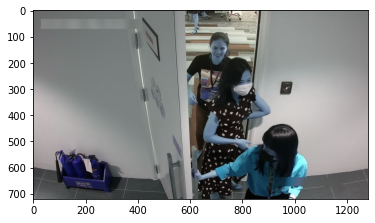

['0 0.553516 0.209028 0.039844 0.104167\n', '1 0.626172 0.386806 0.061719 0.129167\n', '1 0.708203 0.760417 0.050781 0.118056\n']


In [ ]:
img = cv2.imread(str(ls_img[2]))
plt.imshow(img)
plt.show()
with open(ls_lab[2],'r') as f:
  lines = f.readlines()
print(lines)

In [ ]:
def YoloToCor(img_shape,x,y,w,h):
    ''' covert yolo format to coordinate'''
    dh, dw, _ = img_shape
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1
    return l,t,r,b

def CorToYolo(img_shape,l,t,r,b):
    dh, dw, _ = img_shape
    x = (l+r)/2.0 / dw
    y = (t+b)/2.0 / dh
    w = (r-l)/ dw
    h = (b-t)/ dh
    return x,y,w,h

In [ ]:
labels=[]
bbs = BoundingBoxesOnImage([],shape=img.shape)
for line in lines:
  cls,x,y,w,h = map(float,line.split())
  cls = int(cls)
  x1,y1,x2,y2 = YoloToCor(img.shape,x,y,w,h)
  labels.append((cls,x1,y1,x2,y2))
  bbs.bounding_boxes.append(BoundingBox(x1,y1,x2,y2,cls))

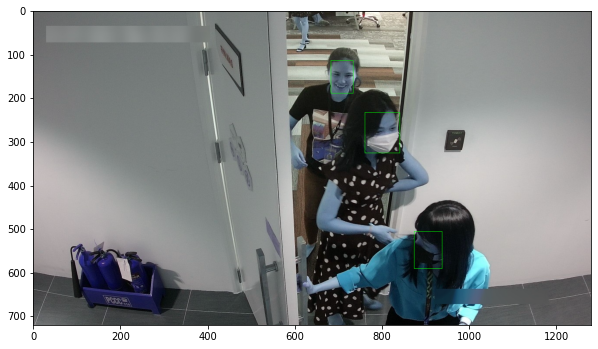

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(bbs.draw_on_image(img))
plt.show()

Define transformation

In [ ]:
seq = iaa.Sequential([
    iaa.Fliplr(1.0),
    iaa.Affine(rotate=(-15,15))
])

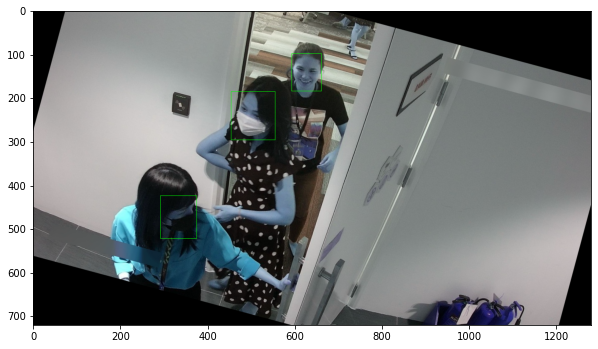

In [ ]:
img_new, bbs_new = seq(image = img, bounding_boxes = bbs)
plt.figure(figsize=(10,10))
plt.imshow(bbs_new.draw_on_image(img_new))
plt.show()

Generate new images and labels

In [ ]:
idx = 0
for img,lab in zip(ls_img,ls_lab):
    if img.stem != lab.stem:
        print('False')
        continue
    idx+=1
    if idx == 200:
      break
    image = cv2.imread(str(img))
    with open(lab,'r') as f:
        lines = f.readlines()
    labels=[]
    bbs = BoundingBoxesOnImage([],shape=image.shape)
    for line in lines:
        cls,x,y,w,h = map(float,line.split())
        cls = int(cls)
        x1,y1,x2,y2 = YoloToCor(image.shape,x,y,w,h)
        labels.append((cls,x1,y1,x2,y2))
        bbs.bounding_boxes.append(BoundingBox(x1,y1,x2,y2,cls))
    image_aug,bbs_aug = seq(image = image,bounding_boxes=bbs)

    new_img_path = Path(target_dir,'images','train','au_'+str(img.stem) + '.jpg')
    cv2.imwrite(str(new_img_path),image_aug)
    
    new_lab_path = Path(target_dir,'labels','train','au_'+str(lab.stem) + '.txt')
    with open(new_lab_path,'w') as f:
        for bb in bbs_aug.bounding_boxes:
            x1,y1,x2,y2,cls = bb.x1,bb.y1,bb.x2,bb.y2,bb.label
            x1,y1,x2,y2 = CorToYolo(image_aug.shape,x1,y1,x2,y2)
            f.write('{} {} {} {} {}\n'.format(cls,x1,y1,x2,y2))

Append to original data

In [ ]:
from shutil import move
from pathlib import Path
def move_all(source, target,suffix):
  source = Path(source)
  target = Path(target)
  ls_file = list(source.glob('*'+suffix))
  for file in ls_file:
    move(file,target / file.name)

In [ ]:
move_all('/content/data_augment/images/train/','/content/Datacomp_demo/Data-Competition/dataset/images/train/','.jpg')
move_all('/content/data_augment/labels/train/','/content/Datacomp_demo/Data-Competition/dataset/labels/train','.txt')

In [ ]:
ls_img = list((source_dir/ 'images' / 'train').glob('**/*.jpg'))
ls_lab = list((source_dir / 'labels' / 'train').glob('**/*.txt'))
ls_img = sorted(ls_img)
ls_lab = sorted(ls_lab)
print('Total number of images and labels: ',len(ls_img),len(ls_lab))

Total number of images and labels:  991 991


#Trainning

In [ ]:
%cd '/content/Datacomp_demo/Data-Competition'

/content/drive/MyDrive/Datacomp_demo/Data-Competition


In [ ]:
#@title Name your version
version = 'demo_flip_rotate' #@param {type: "string"}

In [ ]:
!python train.py --batch-size 64 --device 0 --name $version

100% 755k/755k [00:00<00:00, 40.9MB/s]
Train: data_cfg=config/data_cfg.yaml, batch_size=64, cache=None, device=0, workers=8, name=demo_flip_rotate, weights=pretrains/pretrain.pt, model_cfg=models/yolov5s.yaml, hyp=config/hyps/hyp_finetune.yaml, project=results/train, artifact_alias=latest, epochs=100, img_size=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=False, bucket=, image_weights=False, multi_scale=False, single_cls=False, adam=False, sync_bn=False, entity=, exist_ok=False, quad=False, label_smoothing=0.0, linear_lr=False, bbox_interval=-1, save_period=-1, patience=100
YOLOv5 🚀 2021-11-15 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

cuda:0
Hyper parameters: lr0=0.0032, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, degrees=0.0, translate=0.0, sc

#Evaluation

In [ ]:
!python val.py --weights ./results/train/$version/weights/best.pt --task test --name $version --batch-size 64 --device 0
!python val.py --weights ./results/train/$version/weights/best.pt --task val --name $version --batch-size 64 --device 0

#Inference

In [ ]:
!python detect.py --weights results/train/$version/weights/best.pt --source dataset/images/public_test --dir ./detect_public_test_$version